In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [3]:
walmart_data = pd.read_csv('Walmart.csv')
walmart_data.sample(10)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
5674     40  16-12-2011    1198670.19             0        29.53       3.445   
6106     43  06-01-2012     670993.01             0        47.59       3.157   
2793     20  22-07-2011    1950904.84             0        78.89       3.811   
5022     36  04-06-2010     471088.88             0        79.93       2.664   
5133     36  20-07-2012     303289.55             0        81.76       3.301   
3822     27  03-02-2012    1564246.02             0        42.52       3.796   
4486     32  11-02-2011    1124357.20             1        18.51       3.037   
5248     37  06-01-2012     558343.57             0        57.18       3.157   
27        1  13-08-2010    1508237.76             0        87.00       2.692   
5531     39  16-12-2011    1991824.05             0        58.58       3.159   

             CPI  Unemployment  
5674  136.533516         4.420  
6106  211.242813         9.653  
2793  208.593702         7.274  
5022  209.939809         8.464  
5133  220.614875         6.623  
3822  141.016192         8.009  
4486  191.857288         8.818  
5248  218.406288         7.244  
27    211.639421         7.787  
5531  217.878134         7.716

# Examine the Data Structure

In [70]:
warnings.filterwarnings("ignore", category=FutureWarning)
walmart_data.describe(include='all')

Store                 Date  Weekly_Sales  Holiday_Flag  \
count   6434.000000                 6434  6.434000e+03   6434.000000   
unique          NaN                  143           NaN           NaN   
top             NaN  2010-05-02 00:00:00           NaN           NaN   
freq            NaN                   45           NaN           NaN   
first           NaN  2010-01-10 00:00:00           NaN           NaN   
last            NaN  2012-12-10 00:00:00           NaN           NaN   
mean      23.002487                  NaN  1.047041e+06      0.069941   
std       12.987660                  NaN  5.643776e+05      0.255067   
min        1.000000                  NaN  2.099862e+05      0.000000   
25%       12.000000                  NaN  5.531677e+05      0.000000   
50%       23.000000                  NaN  9.608457e+05      0.000000   
75%       34.000000                  NaN  1.420282e+06      0.000000   
max       45.000000                  NaN  3.818686e+06      1.000000   

        Temperature   Fuel_Price          CPI  Unemployment  \
count   6434.000000  6434.000000  6434.000000   6434.000000   
unique          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN           NaN   
first           NaN          NaN          NaN           NaN   
last            NaN          NaN          NaN           NaN   
mean      60.673531     3.358661   171.575257      7.999024   
std       18.429779     0.459035    39.358967      1.876003   
min        5.540000     2.472000   126.064000      3.879000   
25%       47.495000     2.933000   131.735000      6.891000   
50%       62.675000     3.446500   182.616521      7.874000   
75%       74.945000     3.735000   212.745096      8.622000   
max      100.140000     4.468000   227.232807     14.313000   

        Unemployment_treated         Year  Month          Day  
count            6434.000000  6434.000000   6434  6434.000000  
unique                   NaN          NaN     12          NaN  
top                      NaN          NaN  April          NaN  
freq                     NaN          NaN    629          NaN  
first                    NaN          NaN    NaN          NaN  
last                     NaN          NaN    NaN          NaN  
mean                7.871061  2010.965030    NaN    15.652471  
std                 1.520766     0.797081    NaN     8.752934  
min                 4.294500  2010.000000    NaN     1.000000  
25%                 6.891000  2010.000000    NaN     8.000000  
50%                 7.874000  2011.000000    NaN    16.000000  
75%                 8.622000  2012.000000    NaN    23.000000  
max                11.218500  2012.000000    NaN    31.000000

In [4]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [71]:
warnings.filterwarnings("ignore", category=UserWarning)
walmart_data['Date'] = walmart_data['Date'].astype('datetime64')

In [6]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
walmart_data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [8]:
## Checking size of Dataset

In [9]:
walmart_data.shape

(6435, 8)

## Checking for null values

In [10]:
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Clean and Preprocess the Data

### Checking for outliers

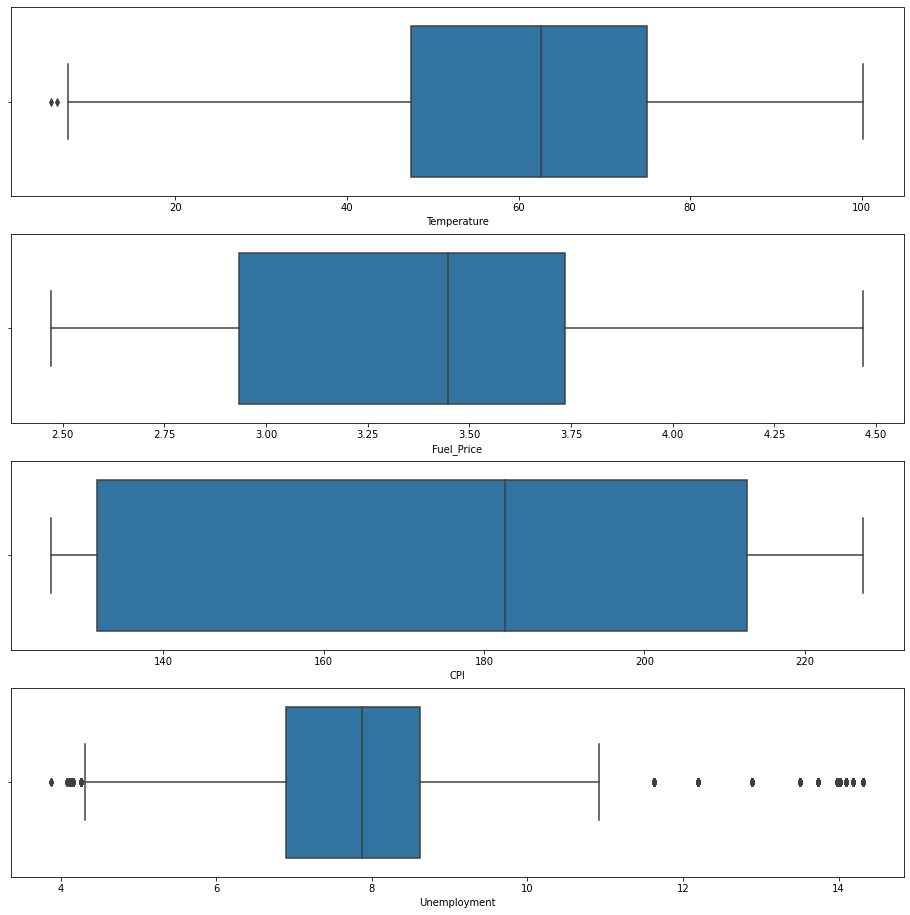

In [73]:
fig,axis = plt.subplots(4,figsize=(16,16))
x=walmart_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i, column in enumerate(x):
    sns.boxplot(walmart_data[column],ax=axis[i])
warnings.filterwarnings("ignore", category=FutureWarning)

In [75]:
walmart_data[(walmart_data['Unemployment']<4.5) | (walmart_data['Unemployment']>11)].shape

(520, 12)

In [76]:
# Using IQR Method
def thr_min_max(col):
    p25= walmart_data[col].quantile(0.25)
    p75=walmart_data[col].quantile(0.75)
    IQR=p75-p25
    
    thr_min,thr_max = p25 - 1.5* IQR , p75+1.5*IQR
    return thr_min,thr_max


def treating(val):
    if(val<thr_min):
        return thr_min
    elif(val>thr_max):
        return thr_max
    else:
        return val

In [77]:
thr_min,thr_max = thr_min_max('Unemployment')
print(thr_min,thr_max)
walmart_data['Unemployment_treated'] = walmart_data['Unemployment'].apply(treating)

4.2945 11.218499999999999


In [78]:
walmart_data.sample(7)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
5360     38 2011-03-06     396826.06             0        71.81       4.031   
2260     16 2012-04-20     436221.26             0        43.61       3.936   
3703     26 2012-07-20    1049625.90             0        66.75       3.610   
3442     25 2010-04-16     715311.60             0        52.16       2.899   
5503     39 2011-03-06    1541745.59             0        83.59       3.699   
5526     39 2011-11-11    1456957.38             0        63.11       3.297   
2651     19 2011-07-29    1298775.80             0        74.86       4.004   

             CPI  Unemployment  Unemployment_treated  Year     Month  Day  
5360  129.049032        13.736               11.2185  2011     March    6  
2260  197.722738         6.169                6.1690  2012     April   20  
3703  138.233193         7.405                7.4050  2012      July   20  
3442  203.730749         7.856                7.8560  2010     April   16  
5503  214.016280         8.300                8.3000  2011     March    6  
5526  216.721737         7.716                7.7160  2011  November   11  
2651  135.963935         7.806                7.8060  2011      July   29

In [15]:
walmart_data[(walmart_data['Temperature']<5)]

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
910      7 2011-04-02     558027.77             0        -2.06       3.011   

            CPI  Unemployment  Unemployment_treated  
910  191.762589         8.818                 8.818

In [16]:
# Only one column with outlier of Temperature. So dropping it off.

walmart_data = walmart_data.drop(walmart_data[(walmart_data['Temperature']<5)].index)

In [17]:
walmart_data.sample(10)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6141     43 2012-07-09     663814.18             1        84.99       3.730   
440       4 2010-04-23    1802677.90             0        56.87       2.805   
302       3 2010-05-28     350089.23             0        78.60       2.759   
3826     27 2012-02-03    1509323.09             0        40.07       3.983   
189       2 2010-12-24    3436007.68             0        49.97       2.886   
2312     17 2010-07-23     893504.87             0        69.66       2.797   
1112      8 2012-03-23     874223.25             0        52.90       3.787   
1759     13 2010-03-12    2083379.89             0        25.80       2.812   
3452     25 2010-06-25     737569.14             0        72.17       2.808   
2105     15 2012-01-27     466045.63             0        30.87       3.737   

             CPI  Unemployment  Unemployment_treated  
6141  213.799099         9.285                 9.285  
440   126.471333         7.896                 7.896  
302   214.203763         7.343                 7.343  
3826  141.387536         8.009                 8.009  
189   211.064660         8.163                 8.163  
2312  126.128355         6.697                 6.697  
1112  224.839942         5.825                 5.825  
1759  126.731333         7.795                 7.795  
3452  204.567546         7.856                 7.856  
2105  136.959839         7.943                 7.943

# Data Visualisation

In [18]:
walmart_data['Store'].unique()
# 45 stores data is present

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [79]:
# Which store has maximum sales 

px.bar(data_frame=walmart_data,x='Store',y='Weekly_Sales')

In [20]:
# Here we can see store 20 has max sales and then Store 4 has 2nd highest sale

In [21]:
# store having maximum standard deviation
store_std = walmart_data.groupby('Store')['Weekly_Sales'].std().reset_index()
px.bar(x=store_std['Store'],y=store_std['Weekly_Sales'])

D:\Download\Anaconda\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [22]:
# Thus, the store which has maximum standard deviation is store number 14, which means that the sales of Store 14 varies the most

In [80]:
# checking which month has high sales
warnings.filterwarnings("ignore", category=DeprecationWarning)
px.bar(x=walmart_data['Date'],y=walmart_data['Weekly_Sales'])

In [24]:
# We can observer from above graph that sales for Month of December is majorly the maximum sales in a year.

In [25]:
# Checking the sales for year 2010

data = walmart_data[(walmart_data['Date']> '2010-01-01') & (walmart_data['Date']< '2011-01-01')].groupby('Store')['Weekly_Sales'].sum()
data=pd.DataFrame(data).reset_index()
data

Store  Weekly_Sales
0       1  7.327883e+07
1       2  9.527786e+07
2       3  1.874542e+07
3       4  9.568047e+07
4       5  1.483603e+07
5       6  7.691232e+07
6       7  2.556808e+07
7       8  4.320447e+07
8       9  2.512922e+07
9      10  9.447220e+07
10     11  6.525514e+07
11     12  4.837038e+07
12     13  9.527274e+07
13     14  1.054622e+08
14     15  3.202353e+07
15     16  2.472863e+07
16     17  4.110492e+07
17     18  5.597842e+07
18     19  7.258053e+07
19     20  1.017331e+08
20     21  3.763111e+07
21     22  5.086528e+07
22     23  6.770911e+07
23     24  6.689065e+07
24     25  3.513627e+07
25     26  4.839070e+07
26     27  9.001318e+07
27     28  6.477876e+07
28     29  2.694683e+07
29     30  2.173909e+07
30     31  6.556027e+07
31     32  5.519094e+07
32     33  1.276683e+07
33     34  4.615042e+07
34     35  5.219597e+07
35     36  2.115313e+07
36     37  2.450847e+07
37     38  1.658779e+07
38     39  6.578228e+07
39     40  4.635736e+07
40     41  5.773822e+07
41     42  2.549809e+07
42     43  3.153701e+07
43     44  1.360752e+07
44     45  3.853634e+07

In [26]:
px.bar(x=data['Store'], y=data['Weekly_Sales'])

D:\Download\Anaconda\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [27]:
# Checking the effect of holiday on Sales
data = walmart_data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
data=pd.DataFrame(data).reset_index()
data

Holiday_Flag  Weekly_Sales
0             0  1.041337e+06
1             1  1.122888e+06

In [82]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
px.bar(x=data['Holiday_Flag'],y=data['Weekly_Sales'],labels={'x':'Holiday or not','y':'Total Sales'})

In [29]:
# We can see that Total Sales are higher during Holidays
walmart_data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Unemployment_treated  
0  211.096358         8.106                 8.106  
1  211.242170         8.106                 8.106  
2  211.289143         8.106                 8.106  
3  211.319643         8.106                 8.106  
4  211.350143         8.106                 8.106

In [30]:
#Year-wise Monthly Sales

walmart_data['Year'] = pd.to_datetime(walmart_data['Date']).dt.year
walmart_data['Month'] = pd.to_datetime(walmart_data['Date']).dt.month_name()
walmart_data['Day'] = pd.to_datetime(walmart_data['Date']).dt.day
year_month_sales = walmart_data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
print(year_month_sales.sort_values(by=['Year', 'Month']))

    Year      Month  Weekly_Sales
0   2010      April  1.838118e+08
1   2010     August  1.845381e+08
2   2010   December  3.235716e+08
3   2010   February  1.915869e+08
4   2010    January  4.223988e+07
5   2010       July  1.842664e+08
6   2010       June  1.424361e+08
7   2010      March  1.862262e+08
8   2010        May  2.806119e+08
9   2010   November  1.587731e+08
10  2010    October  2.311201e+08
11  2010  September  1.797041e+08
12  2011      April  2.784113e+08
13  2011     August  1.880810e+08
14  2011   December  2.293760e+08
15  2011   February  1.876092e+08
16  2011    January  2.119657e+08
17  2011       July  2.244611e+08
18  2011       June  1.401936e+08
19  2011      March  1.365205e+08
20  2011        May  1.828017e+08
21  2011   November  2.534703e+08
22  2011    October  1.837193e+08
23  2011  September  2.310323e+08
24  2012      April  1.825428e+08
25  2012     August  1.916126e+08
26  2012   December  4.612851e+07
27  2012   February  1.428296e+08
28  2012    Ja

In [31]:
px.bar(data_frame=year_month_sales, x='Month',y='Weekly_Sales',color='Year')

D:\Download\Anaconda\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [32]:
px.bar(data_frame=year_month_sales, x='Year',y='Weekly_Sales',color='Year')

D:\Download\Anaconda\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [83]:
# Check effect of Fuel_Price on Weekly_Sales
warnings.filterwarnings("ignore", category=DeprecationWarning)

px.scatter(x=walmart_data['Fuel_Price'],y=walmart_data['Weekly_Sales'])

In [34]:
# From this we can say there is no direct relation bw these two.

In [35]:
# relation bw temperature and sales

px.scatter(x=walmart_data['Temperature'],y=walmart_data['Weekly_Sales'])

D:\Download\Anaconda\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [36]:
px.bar(x=walmart_data['Temperature'],y=walmart_data['Weekly_Sales'],color='Weekly_Sales',data_frame=walmart_data)

D:\Download\Anaconda\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<AxesSubplot:>

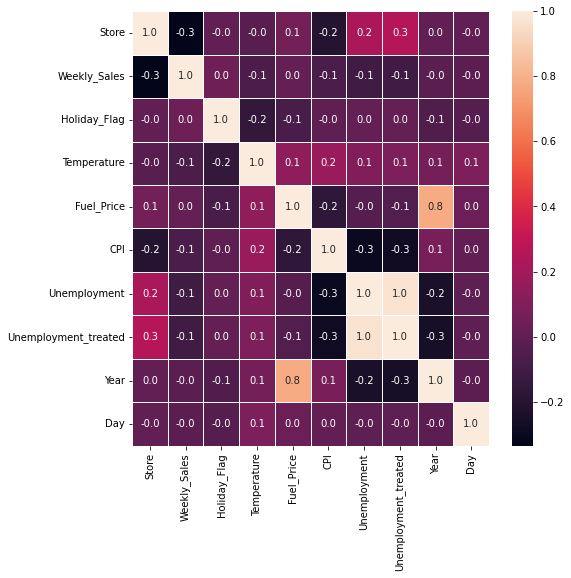

In [37]:
# Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(walmart_data.corr(),annot=True,fmt='.1f',linewidths=.8)

In [85]:
# Standardization

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = walmart_data[['Store','Fuel_Price','CPI','Unemployment','Year']]
Y = walmart_data['Weekly_Sales']
X_std = sc.fit_transform(X)
X_std

array([[-1.69423879, -1.7138609 ,  1.00419743,  0.05702792, -1.21079834],
       [-1.69423879, -1.76614857,  1.00790238,  0.05702792, -1.21079834],
       [-1.69423879, -1.84022277,  1.00909593,  0.05702792, -1.21079834],
       ...,
       [ 1.69385582,  1.39725531,  0.52729082,  0.35609123,  1.29855149],
       [ 1.69385582,  1.32971707,  0.527382  ,  0.35609123,  1.29855149],
       [ 1.69385582,  1.14017428,  0.52682414,  0.35609123,  1.29855149]])

In [91]:
# Linear Regression :

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X_std,Y,test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5147, 5), (1287, 5), (5147,), (1287,))

Accuracy of test data: 13.476939335936533
Mean Absolute Error: 436048.8067362629
Mean Squared Error: 285419121094.3098
Root Mean Squared Error: 534246.3112594319


<AxesSubplot:ylabel='Weekly_Sales'>

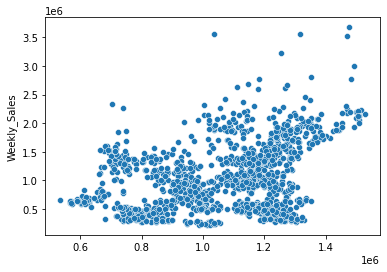

In [92]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_test_pred = reg.predict(X_test)
from sklearn import metrics
print('Accuracy of test data:',reg.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
sns.scatterplot(Y_test_pred, Y_test)

Accuracy of test data: 94.06832847178373
Mean Absolute Error: 74680.64108453768
Mean Squared Error: 19567181988.359875
Root Mean Squared Error: 139882.74371186702


<AxesSubplot:ylabel='Weekly_Sales'>

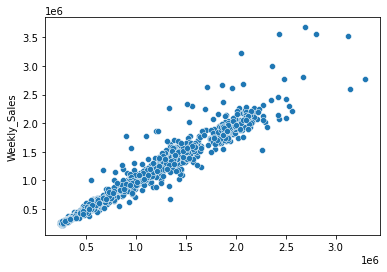

In [96]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
randomfrst = RandomForestRegressor()        
randomfrst.fit(X_train,Y_train)
Y_pred = randomfrst.predict(X_test)
print('Accuracy of test data:',randomfrst.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

Accuracy of Train data: 100.0
Accuracy of test data: 91.07624160355996
Mean Absolute Error:  85680.81022533022
Mean Square Error:  27831739269.170708
Root Mean Square Error:  166828.47259736783


ValueError: continuous is not supported

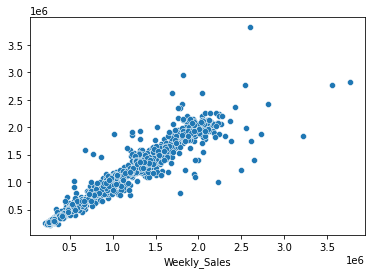

In [97]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X_std,Y,test_size=0.2)
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Accuracy of Train data:", model.score(X_train,y_train)*100)
print('Accuracy of test data:',model.score(X_test, y_test)*100)
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_test))
print("Mean Square Error: ",metrics.mean_squared_error(y_pred_test,y_test))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_pred_test,y_test)))
sns.scatterplot(y_test,y_pred_test)

<AxesSubplot:>

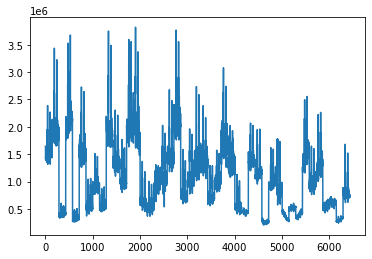

In [51]:
walmart_data['Weekly_Sales'].plot()
# This is seasonal data

In [54]:
from statsmodels.tsa.stattools import adfuller
sales_data = walmart_data['Weekly_Sales']
result = adfuller(sales_data)
p_value = result[1]
print("P_value: ",p_value)
if p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")    

P_value:  0.00011613258802178222
The data is stationary.


In [ ]:
# Our data is stationary and seasonal. We can use SARIMA.

In [62]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

import statsmodels.api as sm

unique_stores = walmart_data['Store'].unique()

order = (1, 1, 1) 
seasonal_order = (1, 1, 1, 12)

for store_id in unique_stores:
    store_data = walmart_data[walmart_data['Store'] == store_id]
    model = sm.tsa.statespace.SARIMAX(store_data['Weekly_Sales'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)
    print(f"Store ID: {store_id}")
    print(forecast)
    print("---------------------")


Store ID: 1
143    1.421157e+06
144    1.511237e+06
145    1.498984e+06
146    1.571846e+06
147    1.510895e+06
148    1.472766e+06
149    1.497334e+06
150    1.504977e+06
151    1.498639e+06
152    1.497632e+06
153    1.511394e+06
154    1.588019e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 2
143    1.709647e+06
144    1.818715e+06
145    1.833277e+06
146    1.946534e+06
147    1.790230e+06
148    1.757251e+06
149    1.805713e+06
150    1.806947e+06
151    1.796017e+06
152    1.812438e+06
153    1.827277e+06
154    1.938755e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 3
143    388216.857328
144    404162.782058
145    412566.886013
146    413998.263833
147    404024.811650
148    397529.323935
149    410445.089803
150    399799.721293
151    415801.653782
152    408450.567700
153    416225.871699
154    425200.567853
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 4
143    2.041562e+06
144    2.144343e+06
145    2.151268e+06
146    2.221072e+06
147    2.092061e+06
148    2.075226e+06
149    2.117922e+06
150    2.108841e+06
151    2.102557e+06
152    2.120777e+06
153    2.127436e+06
154    2.254843e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 5
143    301629.058840
144    316485.721285
145    322151.589739
146    332790.165539
147    324724.096373
148    305834.757204
149    314847.238615
150    322344.244309
151    322412.734600
152    319636.809249
153    319885.382386
154    337477.321497
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 6
143    1.326060e+06
144    1.393026e+06
145    1.420462e+06
146    1.514057e+06
147    1.404896e+06
148    1.321009e+06
149    1.373889e+06
150    1.398986e+06
151    1.343666e+06
152    1.362866e+06
153    1.382155e+06
154    1.474965e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 7
142    483026.421967
143    476887.523339
144    505055.258846
145    558702.924950
146    524734.147861
147    499909.135404
148    499370.220851
149    502102.623655
150    474289.182954
151    468152.625244
152    472499.611932
153    517706.128679
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 8
143    856652.166968
144    888352.748699
145    914389.420730
146    953022.732729
147    885269.091547
148    872350.628913
149    883006.468432
150    898874.555100
151    888383.687663
152    897320.218744
153    904271.287712
154    948172.661624
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 9
143    517610.484030
144    538699.155897
145    560763.164998
146    577024.023170
147    541794.325176
148    532093.759780
149    542536.372482
150    545777.050051
151    550092.456763
152    546778.369030
153    548325.312332
154    585263.154930
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 10
143    1.589181e+06
144    1.684137e+06
145    1.684609e+06
146    1.746737e+06
147    1.630742e+06
148    1.583527e+06
149    1.626618e+06
150    1.662555e+06
151    1.620476e+06
152    1.668422e+06
153    1.696395e+06
154    1.820696e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 11
143    1.141184e+06
144    1.228769e+06
145    1.263735e+06
146    1.309240e+06
147    1.206687e+06
148    1.193993e+06
149    1.228307e+06
150    1.235919e+06
151    1.223171e+06
152    1.220821e+06
153    1.221971e+06
154    1.279151e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 12
143    8.944543e+05
144    9.468992e+05
145    9.613736e+05
146    1.007059e+06
147    9.243962e+05
148    8.881522e+05
149    8.999810e+05
150    9.281921e+05
151    9.134682e+05
152    9.220920e+05
153    9.441334e+05
154    1.019593e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 13
143    1.886184e+06
144    2.003926e+06
145    2.032071e+06
146    2.154235e+06
147    2.000939e+06
148    1.937051e+06
149    1.969310e+06
150    2.012787e+06
151    1.940716e+06
152    2.001291e+06
153    1.996179e+06
154    2.142723e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 14
143    1.581029e+06
144    1.666423e+06
145    1.677572e+06
146    1.758495e+06
147    1.651947e+06
148    1.511710e+06
149    1.561619e+06
150    1.590864e+06
151    1.518937e+06
152    1.544173e+06
153    1.574624e+06
154    1.686491e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 15
143    497904.593035
144    536964.235031
145    560490.456756
146    585138.166644
147    528346.431832
148    516126.036406
149    521156.785637
150    547203.944057
151    509861.260746
152    522842.362229
153    541367.306254
154    600657.494422
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 16
143    459932.510628
144    473957.138744
145    505243.815380
146    562178.003808
147    508027.528402
148    498812.204564
149    497881.626943
150    497276.731788
151    469353.944606
152    468740.842040
153    481614.132123
154    521268.247577
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 17
143    9.339817e+05
144    9.704993e+05
145    9.636929e+05
146    9.742549e+05
147    1.008732e+06
148    1.009985e+06
149    9.638150e+05
150    9.769396e+05
151    9.873773e+05
152    9.602828e+05
153    9.654560e+05
154    9.984090e+05
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 18
143    1.028812e+06
144    1.086008e+06
145    1.133888e+06
146    1.159516e+06
147    1.059133e+06
148    1.046101e+06
149    1.083205e+06
150    1.097129e+06
151    1.042639e+06
152    1.076618e+06
153    1.100703e+06
154    1.141413e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 19
143    1.242664e+06
144    1.309642e+06
145    1.371537e+06
146    1.428446e+06
147    1.328203e+06
148    1.281936e+06
149    1.298922e+06
150    1.326355e+06
151    1.272173e+06
152    1.288462e+06
153    1.306896e+06
154    1.398190e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 20
143    1.908405e+06
144    2.005171e+06
145    2.033275e+06
146    2.135258e+06
147    2.002811e+06
148    1.976357e+06
149    2.028298e+06
150    2.048096e+06
151    2.013433e+06
152    2.034155e+06
153    2.029916e+06
154    2.155646e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 21
143    602747.621197
144    656514.679052
145    685520.139812
146    716730.196930
147    634730.704759
148    620403.449425
149    638534.579733
150    660467.668144
151    624536.698936
152    640774.360643
153    650403.267027
154    712999.656927
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 22
143    9.711302e+05
144    1.027590e+06
145    1.068310e+06
146    1.104629e+06
147    1.005540e+06
148    9.881654e+05
149    1.016676e+06
150    1.030997e+06
151    9.878890e+05
152    1.010654e+06
153    1.033219e+06
154    1.099423e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 23
143    1.254559e+06
144    1.382861e+06
145    1.456402e+06
146    1.500879e+06
147    1.348339e+06
148    1.301811e+06
149    1.366326e+06
150    1.359756e+06
151    1.327029e+06
152    1.364151e+06
153    1.375700e+06
154    1.461985e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 24
143    1.270095e+06
144    1.289145e+06
145    1.330673e+06
146    1.380773e+06
147    1.306845e+06
148    1.264699e+06
149    1.301235e+06
150    1.325828e+06
151    1.277081e+06
152    1.309584e+06
153    1.299906e+06
154    1.371604e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 25
143    639861.693065
144    674036.065516
145    677987.733531
146    710821.835469
147    654818.526029
148    642411.906990
149    656508.055317
150    666752.348562
151    650825.099866
152    662368.720909
153    665605.255015
154    721248.153675
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Store ID: 26
143    9.301615e+05
144    9.729590e+05
145    9.791030e+05
146    1.020783e+06
147    9.570069e+05
148    9.409094e+05
149    9.510409e+05
150    9.592886e+05
151    9.570612e+05
152    9.651970e+05
153    9.635673e+05
154    1.012170e+06
Name: predicted_mean, dtype: float64
---------------------
Store ID: 27
143    1.597124e+06
144    1.652898e+06
145    1.718238e+06
146    1.756774e+06
147    1.640859e+06
148    1.582153e+06
149    1.642099e+06
150    1.678589e+06
151    1.572004e+06
152    1.632052e+06
153    1.658630e+06
154    1.727491e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 28
143    1.116835e+06
144    1.165767e+06
145    1.201462e+06
146    1.236127e+06
147    1.226985e+06
148    1.134030e+06
149    1.143519e+06
150    1.215786e+06
151    1.196819e+06
152    1.175139e+06
153    1.180613e+06
154    1.286185e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 29
143    476080.202420
144    482893.205098
145    534599.561777
146    547888.825843
147    500820.627122
148    485527.629905
149    503123.483051
150    512210.835678
151    487363.749591
152    495484.678847
153    508126.544240
154    557067.344318
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 30
143    438285.000656
144    461711.820736
145    465533.545714
146    467152.870070
147    464556.117764
148    470389.455334
149    471854.188623
150    461937.969405
151    468058.500979
152    464074.509162
153    466777.298661
154    467974.556381
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 31
143    1.293647e+06
144    1.356382e+06
145    1.363162e+06
146    1.400038e+06
147    1.336175e+06
148    1.322686e+06
149    1.352348e+06
150    1.346720e+06
151    1.327761e+06
152    1.353643e+06
153    1.364243e+06
154    1.411540e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Store ID: 32
143    1.133278e+06
144    1.218504e+06
145    1.225970e+06
146    1.253605e+06
147    1.166519e+06
148    1.172438e+06
149    1.187692e+06
150    1.205655e+06
151    1.172442e+06
152    1.192913e+06
153    1.205391e+06
154    1.280561e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 33
143    268008.142209
144    274829.072795
145    272005.593721
146    270513.549597
147    282821.039314
148    279660.872431
149    270571.954929
150    270886.422821
151    272825.813760
152    281667.062785
153    272991.474272
154    275236.621049
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 34
143    9.225300e+05
144    9.643706e+05
145    9.466102e+05
146    9.903917e+05
147    9.478757e+05
148    9.405748e+05
149    9.421435e+05
150    9.598432e+05
151    9.441206e+05
152    9.433930e+05
153    9.538354e+05
154    1.010723e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Store ID: 35
143    773764.758798
144    803411.425949
145    849844.530384
146    893224.408072
147    819469.333669
148    785231.131559
149    786191.523880
150    843185.313679
151    768705.913690
152    808863.249164
153    825420.841259
154    924381.170494
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 36
143    270824.894541
144    297287.989034
145    282413.144390
146    283137.639356
147    285854.191987
148    289530.153351
149    284060.948744
150    273558.128767
151    271339.191852
152    285716.688627
153    278894.743898
154    276794.322306
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 37
143    530700.103125
144    548226.766547
145    555890.670195
146    561013.912391
147    546974.410893
148    548400.192212
149    554655.919494
150    551813.478692
151    561513.107915
152    549881.689182
153    564928.393164
154    559428.945570
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 38
143    414262.283622
144    438174.275439
145    433649.243880
146    436951.095647
147    449073.637935
148    438257.637670
149    440192.191834
150    438411.874051
151    442851.673081
152    445033.153090
153    444670.317050
154    442521.024001
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 39
143    1.479863e+06
144    1.556152e+06
145    1.596881e+06
146    1.657515e+06
147    1.536715e+06
148    1.499507e+06
149    1.541914e+06
150    1.573165e+06
151    1.500477e+06
152    1.531990e+06
153    1.555486e+06
154    1.661404e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 40
143    882933.317694
144    925124.733276
145    946123.265440
146    999111.001963
147    921837.747833
148    902267.037028
149    914440.576295
150    933900.405183
151    912595.119408
152    927979.569323
153    926814.792001
154    981360.071749
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Store ID: 41
143    1.261266e+06
144    1.353695e+06
145    1.352555e+06
146    1.408512e+06
147    1.300282e+06
148    1.292167e+06
149    1.295877e+06
150    1.343277e+06
151    1.283929e+06
152    1.326891e+06
153    1.326076e+06
154    1.426527e+06
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Store ID: 42
143    527159.605119
144    569139.541641
145    573832.016646
146    566825.454388
147    585434.212973
148    578791.679928
149    573580.779130
150    570936.463803
151    581164.530971
152    581966.173061
153    573186.419275
154    575284.292340
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 43
143    605823.526953
144    642219.939020
145    630465.179414
146    632010.146259
147    643462.345616
148    636426.551157
149    625476.926051
150    627410.091171
151    641311.989911
152    631060.586234
153    635819.639759
154    635610.194316
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Store ID: 44
143    343302.480489
144    357312.901781
145    362221.014641
146    366679.858277
147    357964.403436
148    367574.672280
149    362833.176926
150    373710.585780
151    362136.162249
152    365218.358786
153    358537.578101
154    379721.270066
Name: predicted_mean, dtype: float64
---------------------
Store ID: 45
143    688334.902057
144    722057.332235
145    736361.133701
146    782560.025048
147    727876.662515
148    702308.183734
149    713208.502955
150    735743.965671
151    696949.241392
152    711343.324672
153    727171.451288
154    786707.313401
Name: predicted_mean, dtype: float64
---------------------


D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

